In [2]:
import pandas as pd

# Assuming your dataset is in a CSV file named 'water_potability.csv'
# Replace 'water_potability.csv' with the actual filename if different
try:
    df = pd.read_csv('/content/drive/MyDrive/water_potability.csv')
except FileNotFoundError:
    print("Error: 'water_potability.csv' not found. Please upload the file or provide the correct path.")
    # You might want to handle this error more gracefully, e.g., by exiting the script.
    exit()


# Select the specified columns
selected_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                    'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

# Check if all selected columns exist in the DataFrame
missing_cols = set(selected_columns) - set(df.columns)
if missing_cols:
    print(f"Warning: The following columns are not found in the dataset: {missing_cols}")
    # You might choose to handle this differently, e.g., by removing missing cols from the list or raising an error.
    selected_columns = [col for col in selected_columns if col in df.columns]

df_selected = df[selected_columns]


# Display information about the dataset
print("Dataset Information:")
print(df_selected.info())

print("\nUnique Values:")
for col in df_selected.columns:
  print(f"\nColumn: {col}")
  print(df_selected[col].unique())

print(f"\nNumber of rows: {len(df_selected)}")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

Unique Values:

Column: ph
[       nan 3.71608008 8.09912419 ... 9.41951032 5.12676292 7.87467136]

Column: Hardness
[204.89045547 129.42292051 224.23625939 ... 175.7626463  230.60375751
 195.10229859]

Column: Solids
[20791.31898075 18630.05785797 19909.5417322

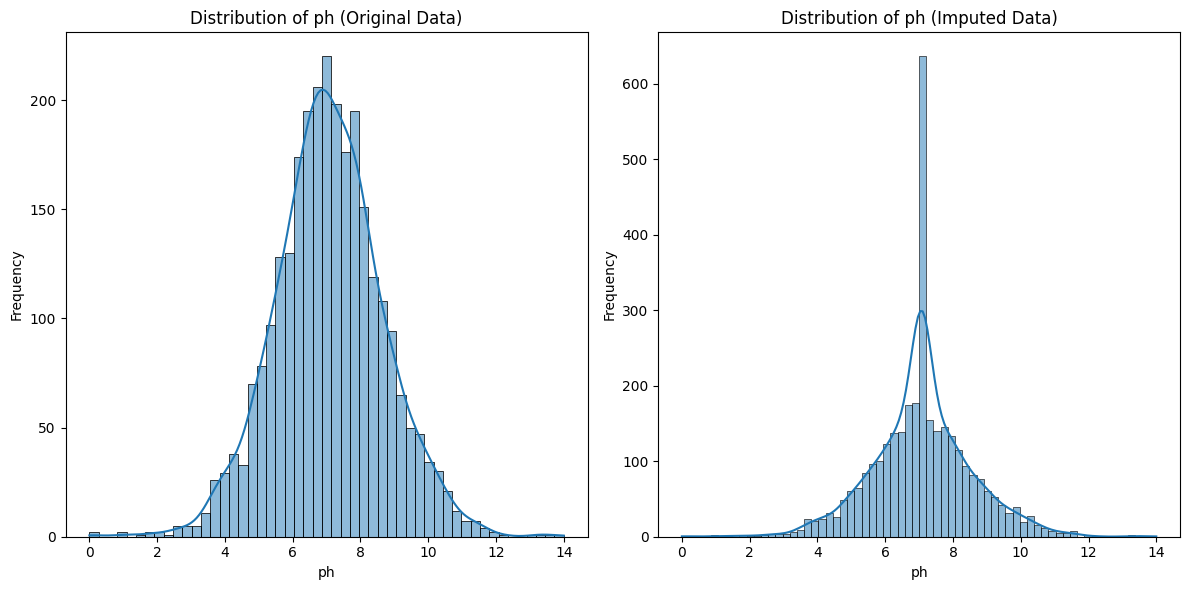

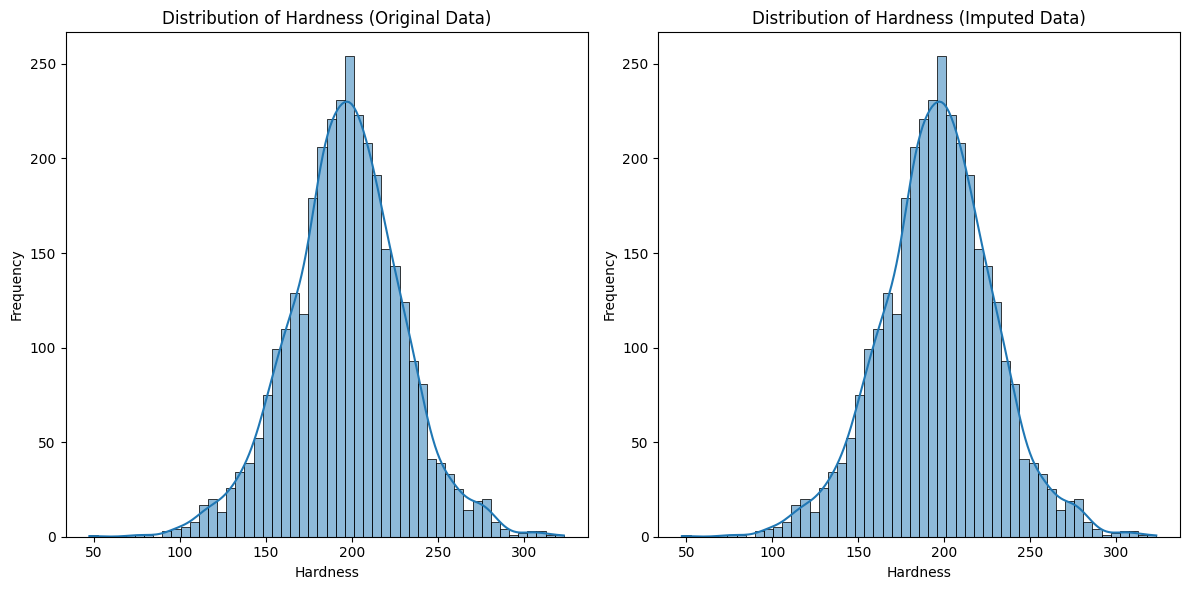

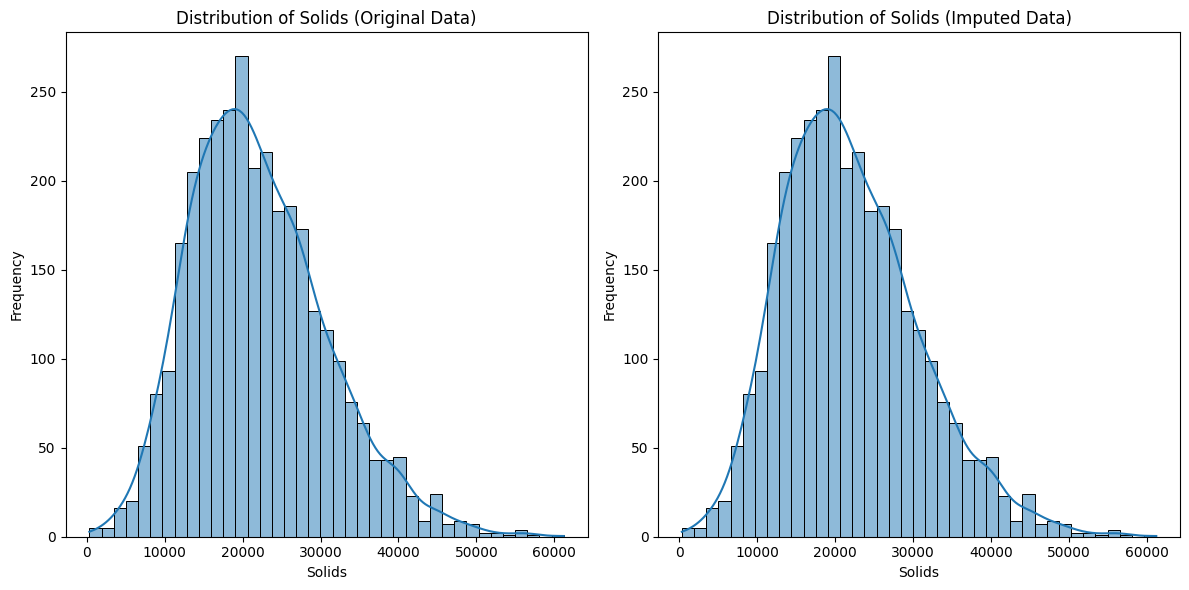

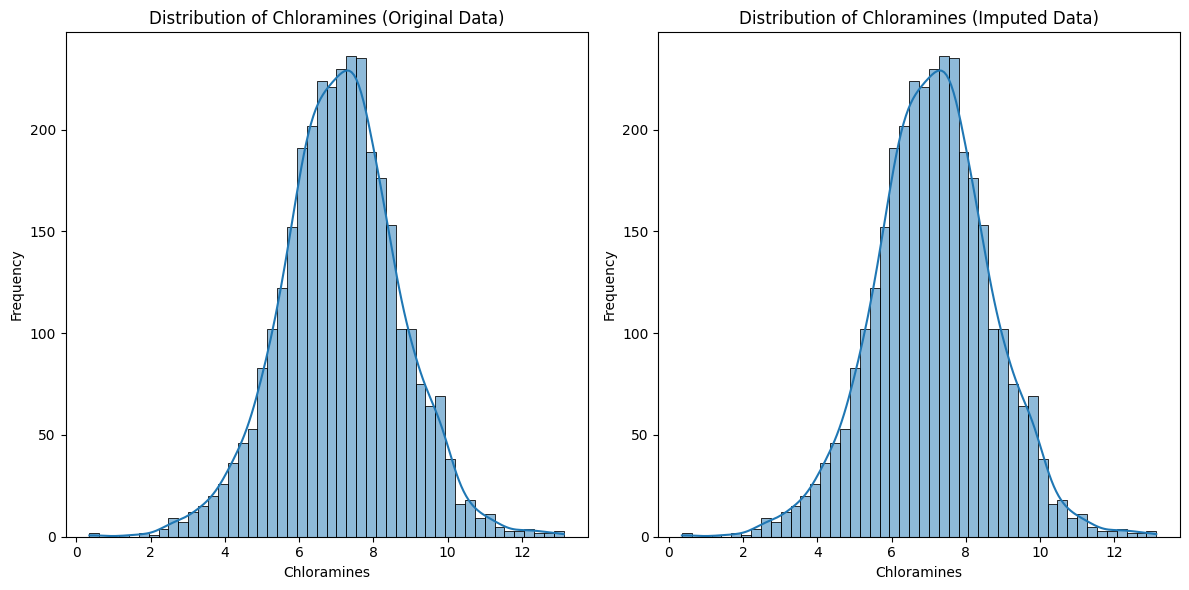

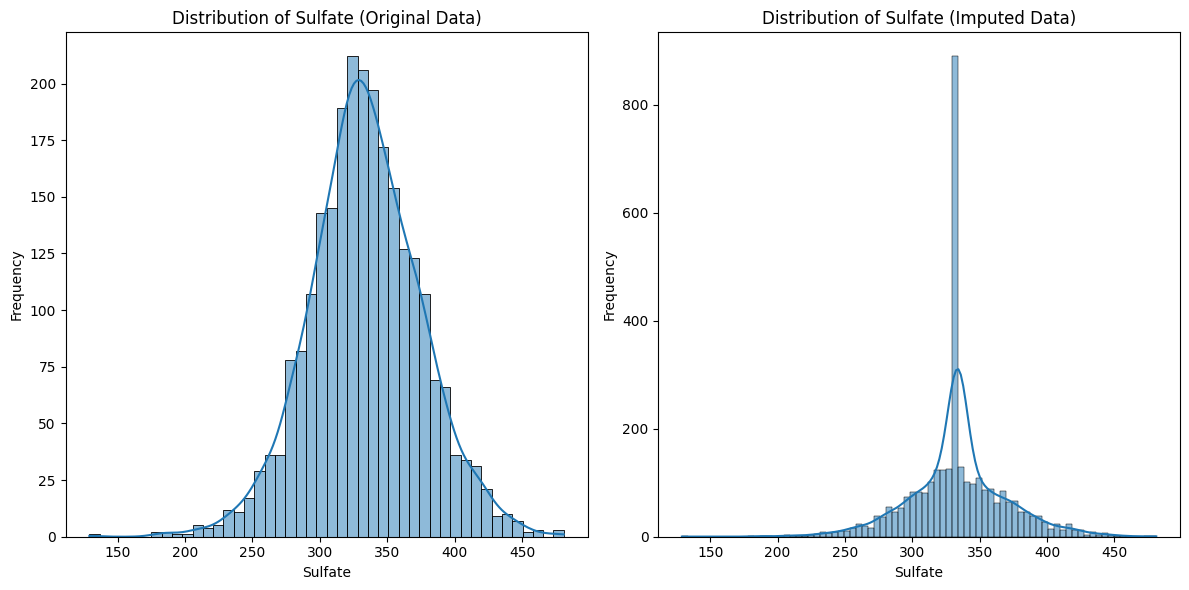

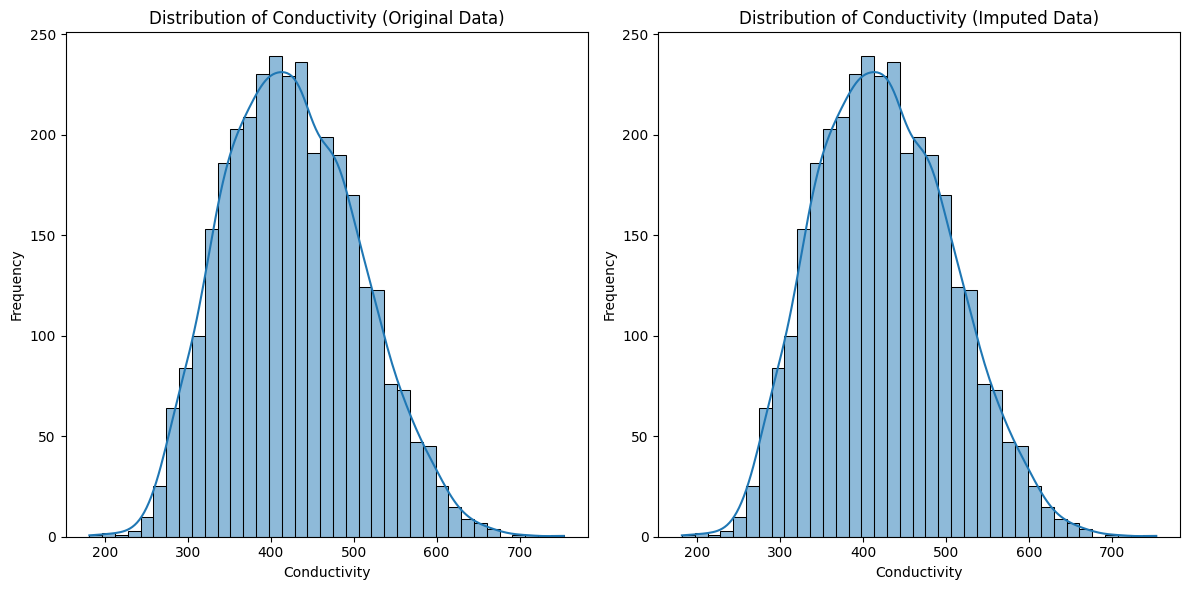

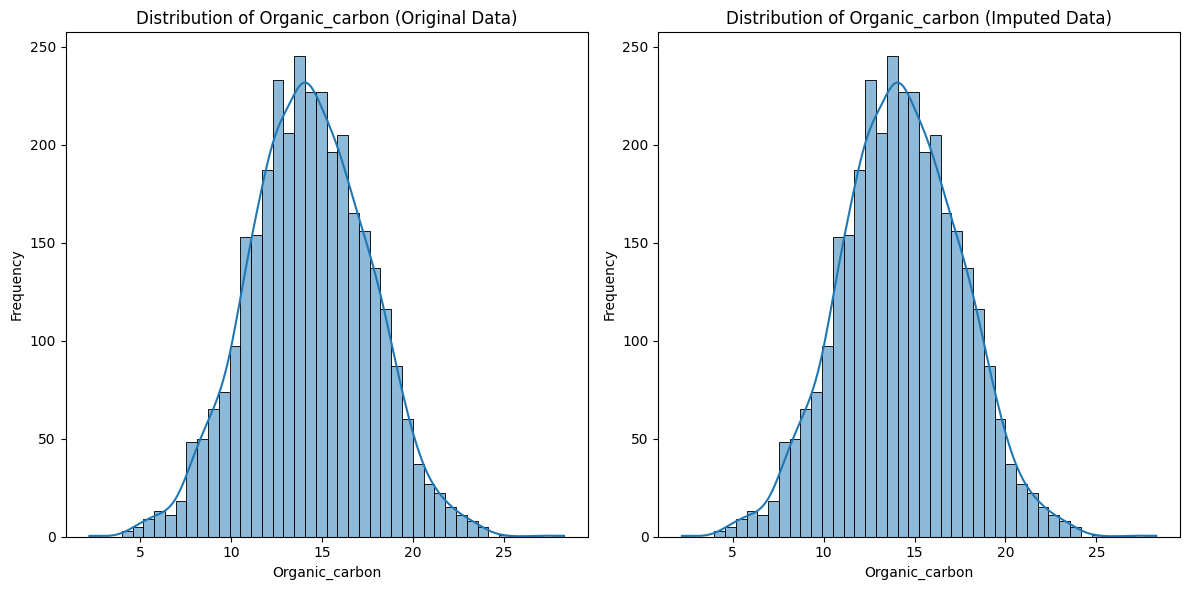

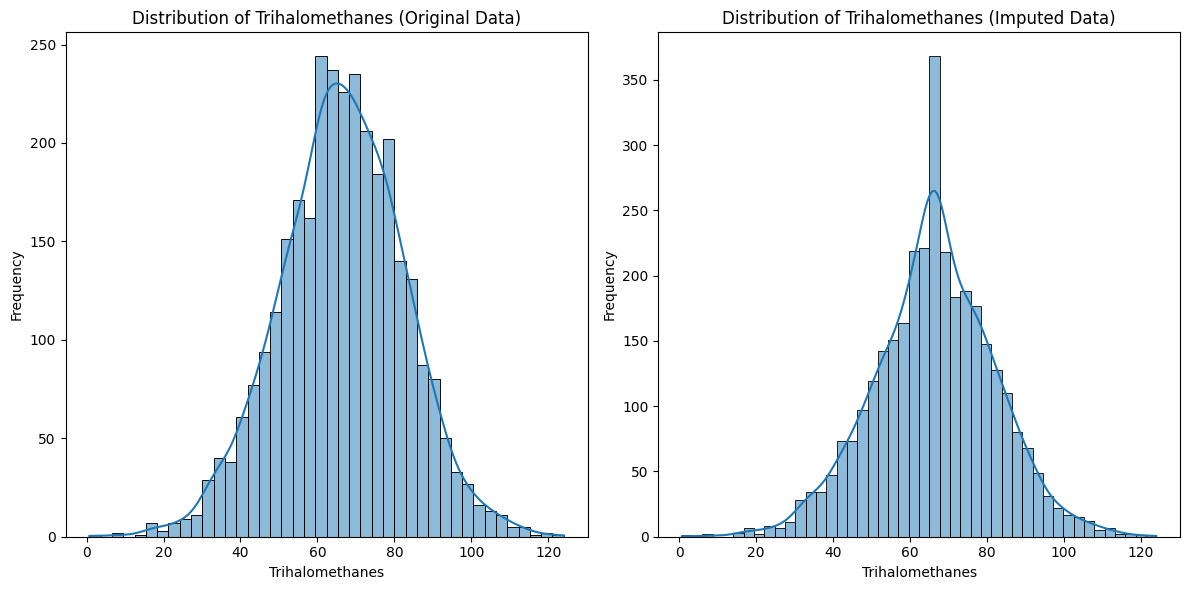

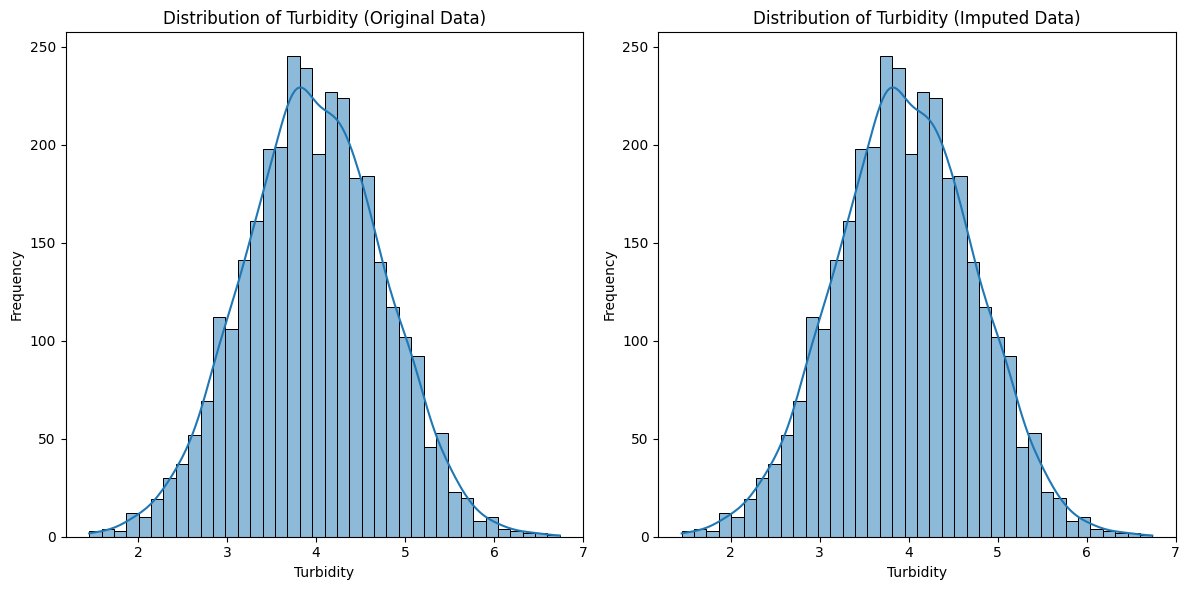

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# ... (your existing code) ...

# Handling missing values and outliers using mean imputation
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_selected), columns=df_selected.columns)

# Visualizing data distribution before and after resampling
# Assuming 'Potability' is your target variable
for col in df_selected.columns:
    if col != 'Potability':
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(df_selected[col], kde=True)
        plt.title(f'Distribution of {col} (Original Data)')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.histplot(df_imputed[col], kde=True)
        plt.title(f'Distribution of {col} (Imputed Data)')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

In [4]:

# Assuming df_selected is your DataFrame with the selected columns and imputed values
X = df_imputed.drop('Potability', axis=1)  # Features
y = df_imputed['Potability']  # Target variable

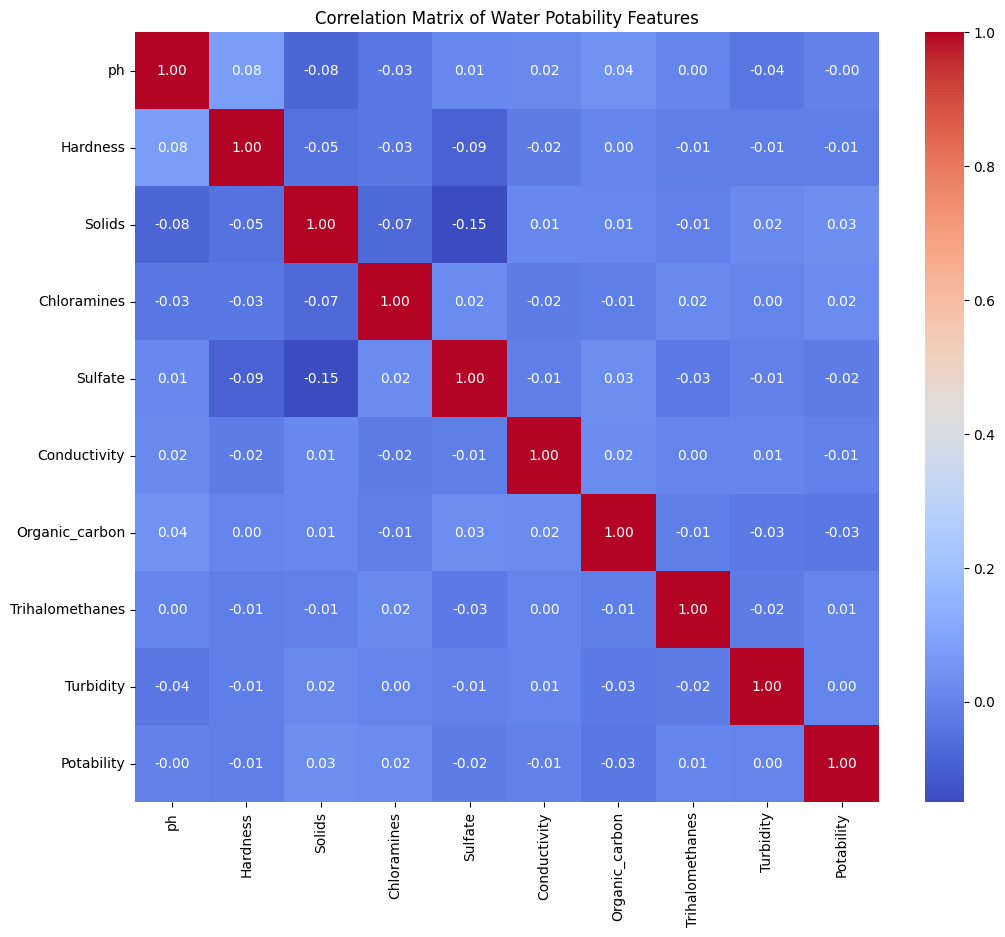

In [5]:

# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df_imputed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Water Potability Features')
plt.show()

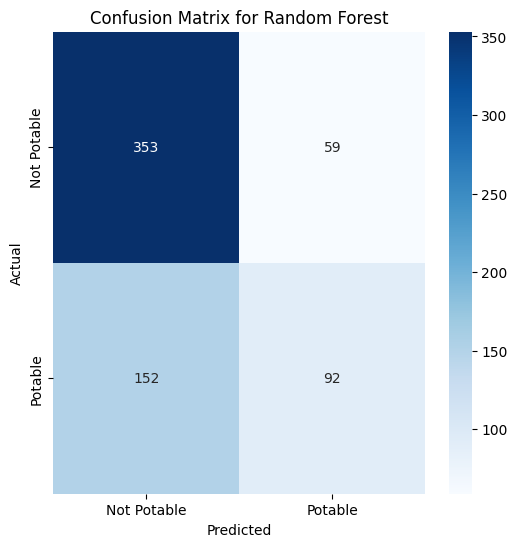

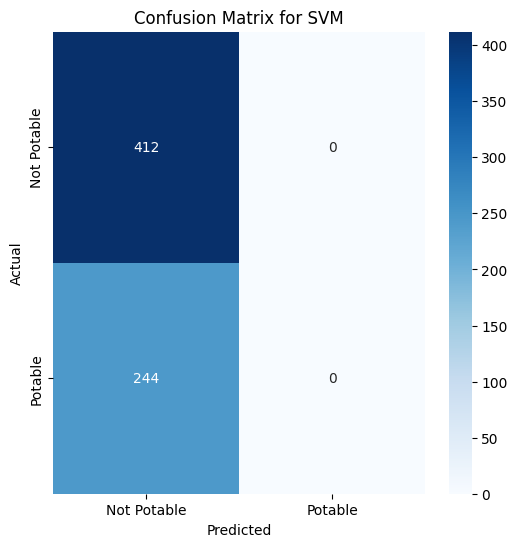

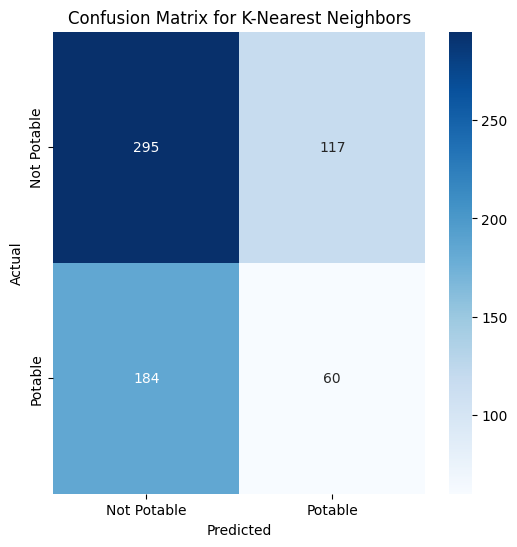

Classifier Accuracy:
Random Forest: 0.6784
SVM: 0.6280
K-Nearest Neighbors: 0.5412


In [6]:


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Not Potable', 'Potable'],
                yticklabels=['Not Potable', 'Potable'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Compare results
print("Classifier Accuracy:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

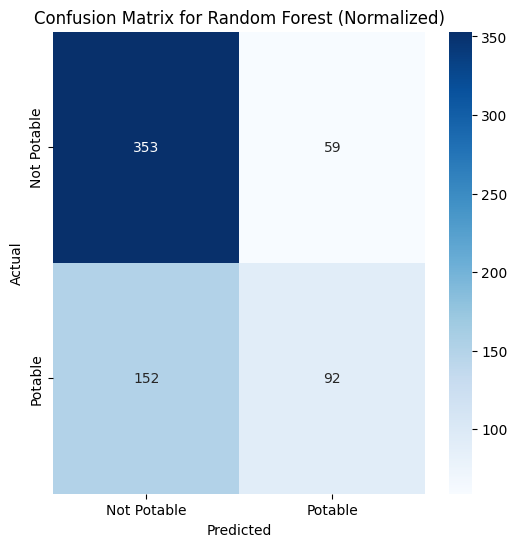

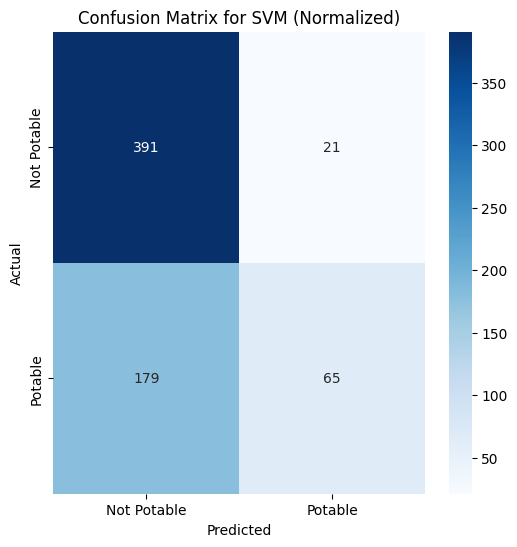

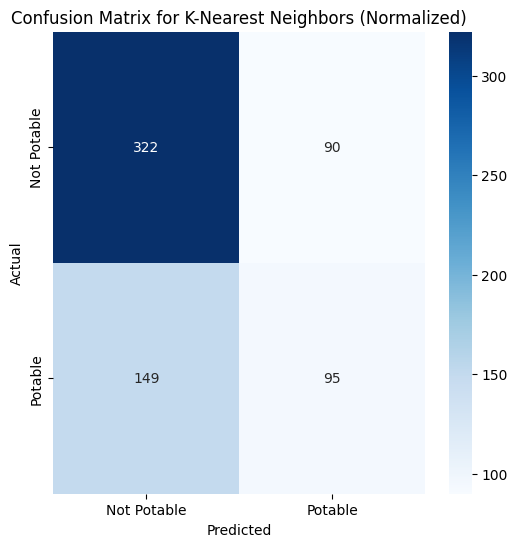


Classifier Accuracy (Before Normalization):
Random Forest: 0.6784
SVM: 0.6280
K-Nearest Neighbors: 0.5412

Classifier Accuracy (After Normalization):
Random Forest: 0.6784
SVM: 0.6951
K-Nearest Neighbors: 0.6357


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate each classifier with normalized data
results_normalized = {}
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred_scaled = clf.predict(X_test_scaled)
    accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
    results_normalized[name] = accuracy_scaled

    # Confusion Matrix (Normalized)
    cm_scaled = confusion_matrix(y_test, y_pred_scaled)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_scaled, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Not Potable', 'Potable'],
                yticklabels=['Not Potable', 'Potable'])
    plt.title(f'Confusion Matrix for {name} (Normalized)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Compare results (before and after normalization)
print("\nClassifier Accuracy (Before Normalization):")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

print("\nClassifier Accuracy (After Normalization):")
for name, accuracy_scaled in results_normalized.items():
    print(f"{name}: {accuracy_scaled:.4f}")